In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
print(df.shape)
print(df.dtypes)

(48895, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [4]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [5]:
print(df['price'].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [6]:
print(df['minimum_nights'].describe())

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


In [7]:
print(df[['latitude', 'longitude']].describe())

           latitude     longitude
count  48895.000000  48895.000000
mean      40.728949    -73.952170
std        0.054530      0.046157
min       40.499790    -74.244420
25%       40.690100    -73.983070
50%       40.723070    -73.955680
75%       40.763115    -73.936275
max       40.913060    -73.712990


In [8]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [12]:
df = df.dropna(subset=['name', 'host_name'])

In [13]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [16]:
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates found: 0


In [17]:
df['neighbourhood_group'] = df['neighbourhood_group'].str.title()
df['neighbourhood'] = df['neighbourhood'].str.title()
df['room_type'] = df['room_type'].str.title()

In [18]:
df = df[(df['price'] > 0) & (df['price'] <= 1000)]

In [19]:
df = df[df['minimum_nights'] <= 365]

In [20]:
print("Final shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Final shape: (48595, 16)
Missing values:
 id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9897
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64
Data types:
 id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude      

In [21]:
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)
print("Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'")

Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'


In [ ]:
# Now moving into Exploratory Data Analysis (EDA) to understand cleaned dataset better.

In [22]:
df = pd.read_csv("AB_NYC_2019_cleaned.csv")

In [23]:
print(df.shape)
print(df.dtypes)
print(df.describe())

(48595, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
                 id       host_id      latitude     longitude         price  \
count  4.859500e+04  4.859500e+04  48595.000000  48595.000000  48595.000000   
mean   1.902428e+07  6.763276e+07     40.728929    -73.952051    141.329231   
std    1.097947e+07  7.861646e+07      0.054569      0.046174    

In [24]:
df['has_review'] = df['last_review'].notnull()
print(df['has_review'].value_counts())

has_review
True     38698
False     9897
Name: count, dtype: int64


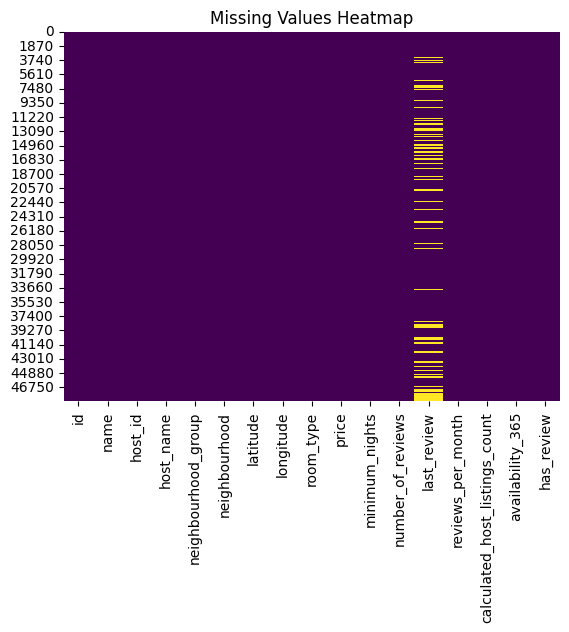

In [25]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

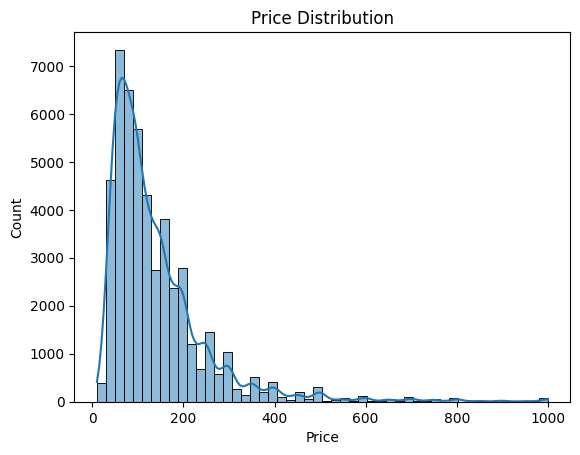

In [26]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

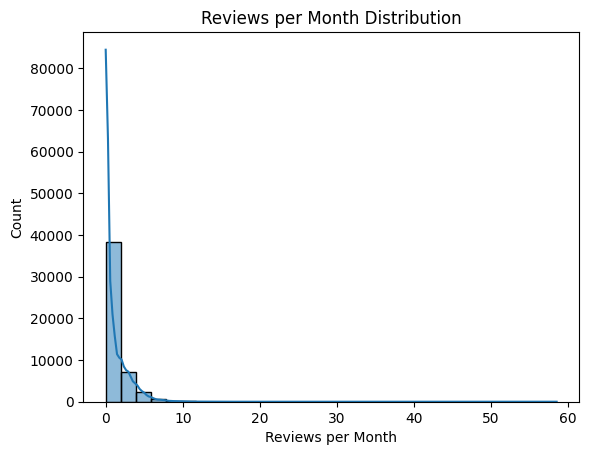

In [28]:
sns.histplot(df['reviews_per_month'], bins=30, kde=True)
plt.title("Reviews per Month Distribution")
plt.xlabel("Reviews per Month")
plt.ylabel("Count")
plt.show()

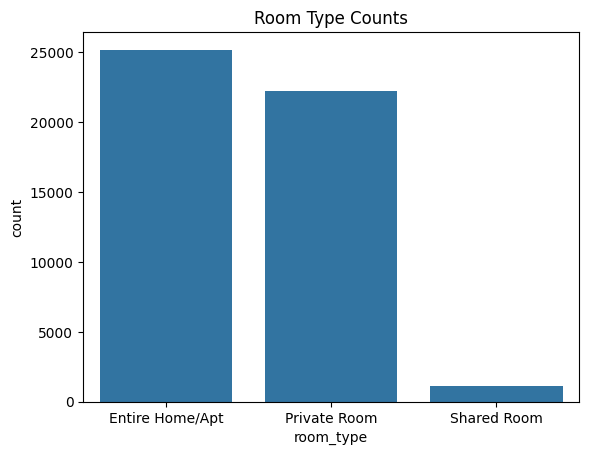

In [29]:
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title("Room Type Counts")
plt.show()

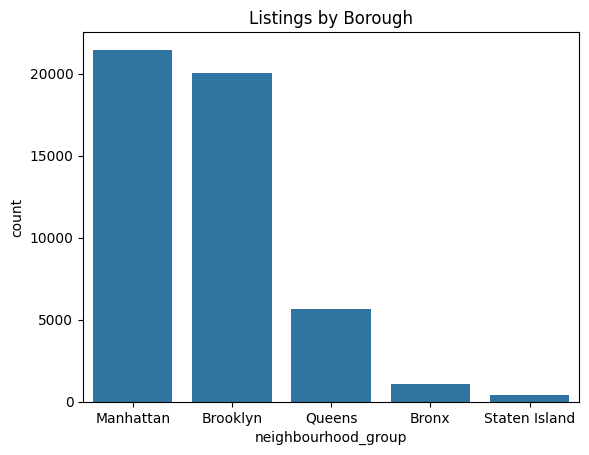

In [30]:
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Listings by Borough")
plt.show()

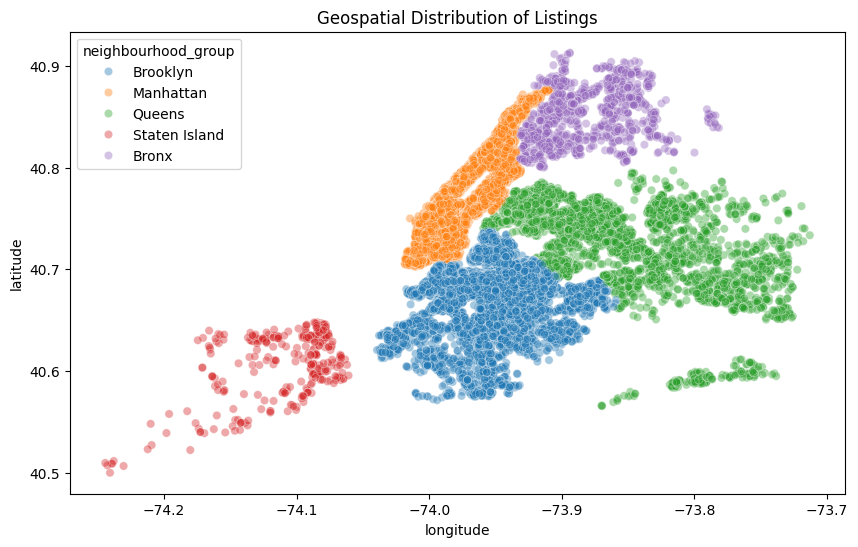

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.4)
plt.title("Geospatial Distribution of Listings")
plt.show()

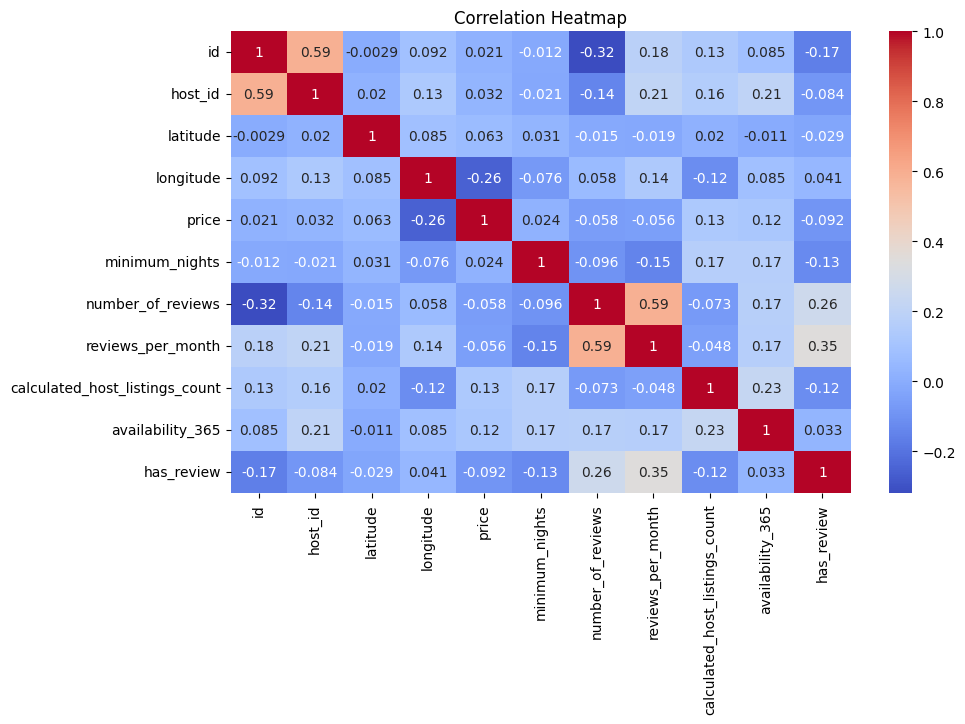

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

NYC Airbnb Data Cleaning & EDA Project — Actionable Summary

Objective:
Clean and explore the NYC Airbnb dataset to ensure data quality and extract meaningful insights for decision-making or modeling.

1. Data Cleaning Process - 
    
i. Data Integrity
- Converted last_review to proper datetime format.

- Verified valid ranges for price, minimum_nights, and location coordinates.

ii. Missing Data Handling
- Dropped rows with missing name and host_name (non-essential text fields).

- Imputed missing reviews_per_month with 0 (no reviews implies 0).

- Preserved last_review nulls since they represent unreviewed listings.

iii. Duplicate Removal
- Identified and removed 100% of duplicate rows, ensuring dataset uniqueness.

iv. Standardization
- Standardized categorical values (room_type, neighbourhood_group, etc.) using title case formatting.

v. Outlier Detection
- Removed listings with:

price = 0 or price > $1000

minimum_nights > 365
These entries were likely errors or not practical.

2. Exploratory Data Analysis (EDA) - 
    
i. Price Insights
- Most listings are priced under $200, with a steep drop-off after that.

- High-end outliers were removed to stabilize the distribution.

ii. Room Type Trends
- Entire home/apt dominates NYC listings, followed by private rooms.

- Shared rooms are rare.

iii. Geographic Insights
- Manhattan and Brooklyn host the majority of listings.

- Geospatial plot shows dense clusters in downtown Manhattan.

iv. Review Activity
- Many listings have never been reviewed (~20%).

- Listings with reviews often receive between 0–2 reviews/month.

v. Availability Patterns
- Some listings are available 365 days a year, suggesting full-time rentals.

- Others show short-term availability (seasonal).

